In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# **To import files from google drive**

In [2]:
from google.colab import drive
drive.mount("/content/gdrive/")

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).



# **Importing the libraries**


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [4]:
 df = pd.DataFrame(pd.read_csv("/content/gdrive/My Drive/TSF GRIP/Prediction using Decision Tree/Iris.csv"))

In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.shape

(150, 6)

In [7]:
X = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

# **Splitting the data into training and test sets**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1,random_state = 42)

# **Applying the transforms on training and test sets**

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **Decision Tree classifier**

In [10]:
classifier = DecisionTreeClassifier(criterion='entropy',random_state=42) # using the entropy criterion

In [11]:
classifier.fit(X_train,y_train) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

# **Predicting on the test set**

In [12]:
y_pred = classifier.predict(X_test)

In [13]:
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa'], dtype=object)

# **Developing the confusion matrix and getting the accuracy_score metric**

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[6 0 0]
 [0 6 0]
 [0 0 3]]


1.0

# Let us visualize the Decision Tree to understand it better.

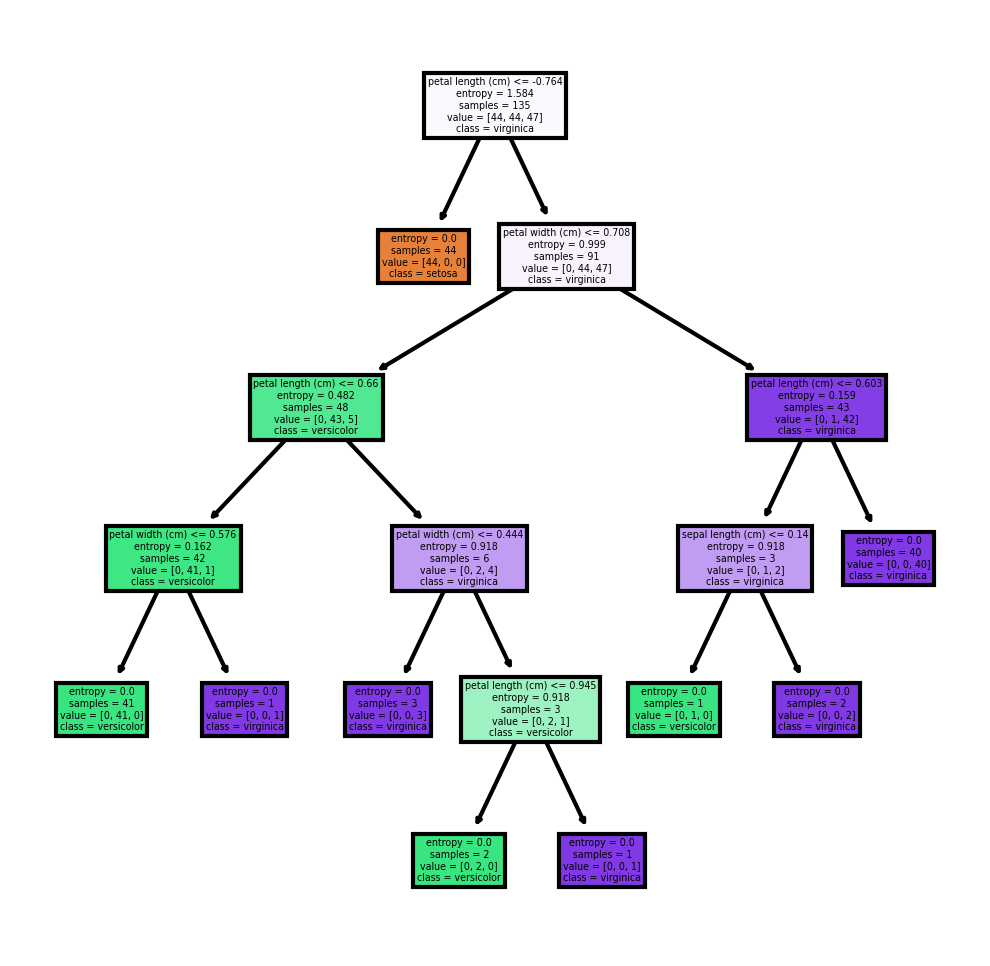

In [15]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'] # features
cn=['setosa','versicolor','virginica'] # number of categories

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(classifier, feature_names = fn, class_names = cn, filled = True);